**Mini Project: Data Visualization with Pandas, Seaborn, and Matplotlib**


**Project Overview**

In this mini project, you will explore, analyze, and visualize a real-world dataset using Python libraries: Pandas for data manipulation, Seaborn for statistical visualizations, and Matplotlib for additional customization. The goal is to extract meaningful insights from the data through visual analysis.
Dataset

**What you will learn**

Mastery of Pandas for data manipulation and preparation.

Understanding the distribution and range of data through basic statistical methods.

Ability to create a variety of plots including bar charts, scatter plots, pie charts, and boxplots using Seaborn.

Skills in using Matplotlib for further customization of visualizations.

Experience in comparing different aspects of data through various visualization types.

Experience in using advanced Seaborn functions like pairplot for exploring pairwise relationships.

Skills in drawing meaningful conclusions and insights from data.

Experience in working with a real-world dataset to solve a practical data visualization problem.


**Dataset**

We will use the “Palmer Penguins” dataset, a popular dataset for data exploration and visualization. It contains various measurements for three species of penguins from Palmer Station, Antarctica.

Dataset URL: Palmer Penguins Dataset

**Task**

**Data Loading and Cleaning:**

Load the dataset using Pandas.

Perform basic data cleaning (handling missing values, incorrect data types, etc.).

**Exploratory Data Analysis (EDA):**

Use Pandas to summarize the key statistics of the dataset.

Identify unique values, ranges, and distribution of data.

**Visualization Tasks**:

Species Distribution: Use a bar chart to show the distribution of penguin species.

Flipper Length vs. Body Mass: Create a scatter plot to analyze the relationship between flipper length and body mass, color-coded by species.

Island Distribution: Visualize the count of penguins on each island using a pie chart.

Sex Distribution within Species: Create grouped bar charts showing the distribution of sex within each penguin species.

Heatmap of Correlations: Plot a heatmap to visualize the correlations between numerical variables.

Boxplots for Measurements: Generate boxplots for flipper length, body mass, and bill measurements, segmented by species.

Histograms of Measurements: Create histograms to show the distribution of key measurements (bill length, bill depth, flipper length).

**Insightful Visualizations:**

Combine multiple plots into a single figure (using subplots) to compare different aspects of the data.
Use Seaborn’s pairplot to visualize pairwise relationships in the dataset.


**Conclusion:**

Summarize the insights and patterns observed from the visualizations.


**Guidelines**

Ensure each visualization is accompanied by a brief interpretation.

Customize the aesthetics of your plots (colors, labels, titles) for clarity and readability.

Where appropriate, use Seaborn’s advanced visualization capabilities for more insightful plots.

Comment your code to explain the steps taken in your analysis and visualization process.

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [1]:
# Uploading the file
from google.colab import files
uploaded = files.upload()

Saving Palmer Penguins Dataset.csv to Palmer Penguins Dataset.csv


In [6]:
df = pd.read_csv('Palmer Penguins Dataset.csv')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [10]:
# Impute missing values for 'Sex' with mode
sex_mode = df['sex'].mode()[0]
df['sex'] = df['sex'].fillna(sex_mode)

# Impute missing numerical values with the mean
numerical_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].mean())

# Check if all missing values are handled
df.isnull().sum()

,0
species,0
island,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0
year,0


In [12]:
print('\nBasic Statistics:')
df.describe()


Basic Statistics


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,344.000000,344.000000,344.000000,344.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.443643,1.969027,14.020657,799.613058,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.275000,15.600000,190.000000,3550.000000,2007.000000
50%,44.250000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


**bill\_length\_mm**

* Mean ≈ 43.9 mm, range from 32.1 mm to 59.6 mm → shows a moderate spread (\~27 mm).
* Middle 50% (IQR) between \~39.3 mm and \~48.5 mm.

**bill\_depth\_mm**

* Mean ≈ 17.15 mm, with a tighter spread (min 13.1 mm, max 21.5 mm).
* 50% of penguins fall between \~15.6 mm and \~18.7 mm.

**flipper\_length\_mm**

* Mean ≈ 200.9 mm, ranging from 172 mm to 231 mm → about a 60 mm spread.
* Most penguins’ flippers fall between \~190 mm and \~213 mm.

**body\_mass\_g**

* Mean ≈ 4201.8 g (about 4.2 kg), ranging from 2.7 kg to 6.3 kg.
* 50% of penguins are between \~3.55 kg and \~4.75 kg.

There’s noticeable variability in body size (bill, flippers, mass) — likely reflecting species differences.


In [13]:
print('\nUnique Values:')
df.nunique()


Unique Values:


,0
species,3
island,3
bill_length_mm,165
bill_depth_mm,81
flipper_length_mm,56
body_mass_g,95
sex,2
year,3


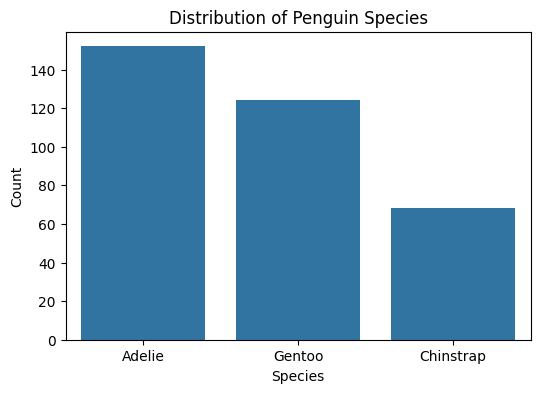

In [16]:
# Species Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='species')
plt .title('Distribution of Penguin Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

* **Adelie** penguins are the most common in the dataset, with \~150 records.
* **Gentoo** penguins follow, with \~125 records.
* **Chinstrap** penguins are the least represented, with \~70 records.

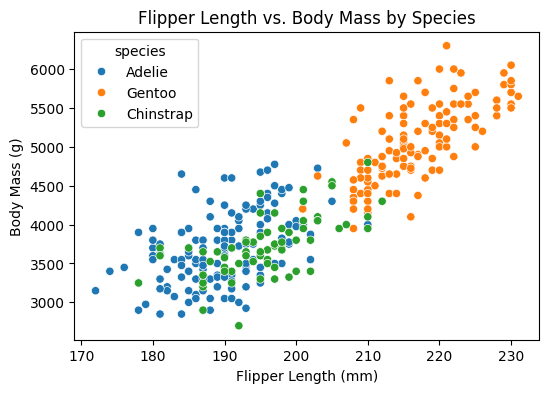

In [19]:
# Flipper Length vs. Body Mass
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='flipper_length_mm', y='body_mass_g', hue ='species')
plt.title('Flipper Length vs. Body Mass by Species')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.show()

**Adelie (blue)**

* Clustered in the lower-left zone: shorter flippers (≈180–200 mm) and lighter body mass (≈3000–4000 g).

**Chinstrap (green)**

* Overlaps somewhat with Adelie in flipper length (≈185–205 mm) but slightly higher body mass (≈3500–4000 g).

**Gentoo (orange)**

* Clearly separated: longer flippers (≈205–230 mm) and significantly heavier body mass (≈4500–6000 g).

There’s a **strong positive relationship** between flipper length and body mass: bigger penguins generally have longer flippers.

Species differences are visually distinct, especially for Gentoo, which stands apart from Adelie and Chinstrap.

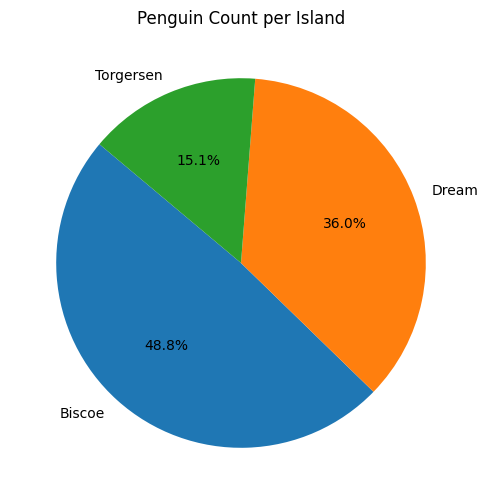

In [20]:
# Island Distribution (Pie Chart)
island_counts = df['island'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(island_counts, labels=island_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Penguin Count per Island')
plt.show()

**Biscoe Island** 48.8% of penguins
**Dream Island** 36% of penguins
**Torgersen Island** 15.1% of penguins

Nearly half of the penguin records come from **Biscoe**, making it the dominant sampling location.

**Dream** also contributes a large portion (\~one-third), while **Torgersen** has the fewest penguins sampled.

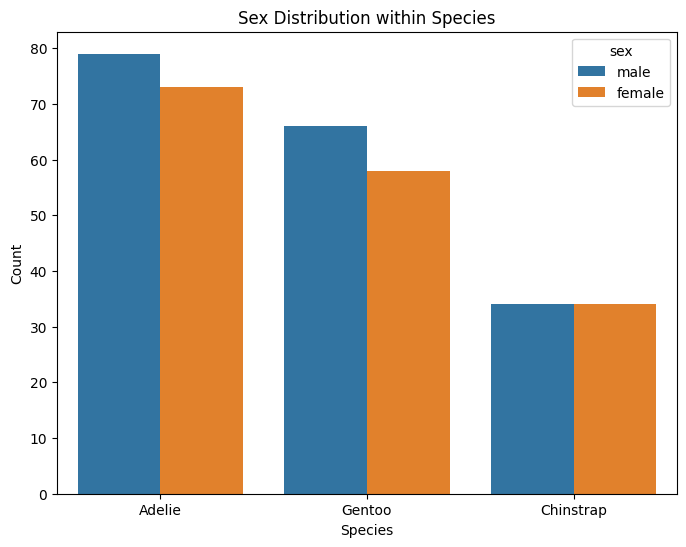

In [21]:
# Sex Distribution within Species
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='species', hue='sex')
plt.title('Sex Distribution within Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

**Adelie**

* Fairly balanced, with a slight male majority.

**Gentoo**

* Also balanced, with slightly more males than females.

**Chinstrap**

* Perfectly balanced — male and female counts are equal.

Across all three species, the dataset maintains a fairly even sex distribution, meaning **no major sex bias** in the sampling.

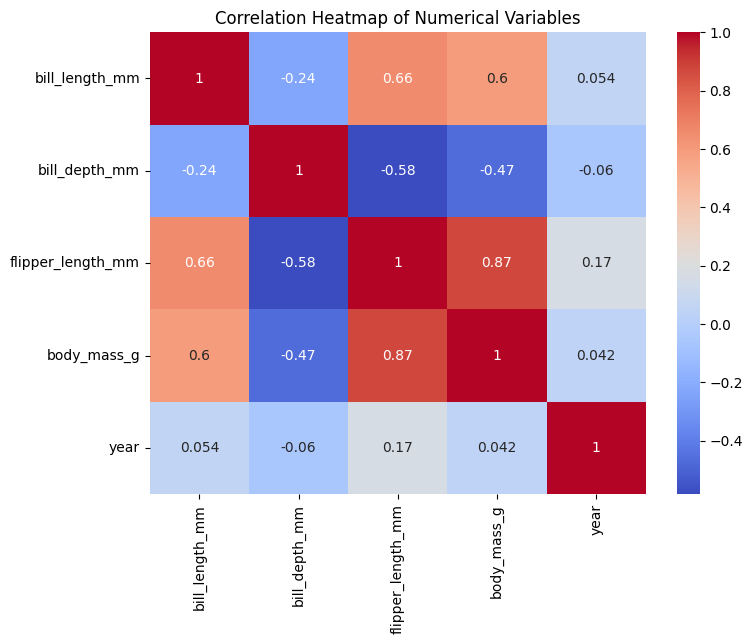

In [22]:
# Heatmap of Correlations
plt.figure(figsize=(8,6))
num_df = df.select_dtypes(include=[np.number])
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

**Strong positive correlations:**

* **Flipper length & body mass** (0.87): Penguins with longer flippers tend to weigh more.
* **Bill length & flipper length** (0.66) and **bill length & body mass** (0.60): Larger bills generally go with larger body sizes.

**Strong negative correlations:**

* **Bill depth & flipper length** (-0.58): Penguins with deeper bills tend to have shorter flippers.
* **Bill depth & bill length** (-0.24): Slight negative relationship — deeper bills are not necessarily longer.


The strongest relationships are between body size indicators (flipper, body mass, bill), showing clear size patterns.

Bill depth behaves somewhat independently, suggesting it reflects a shape feature rather than just overall size.

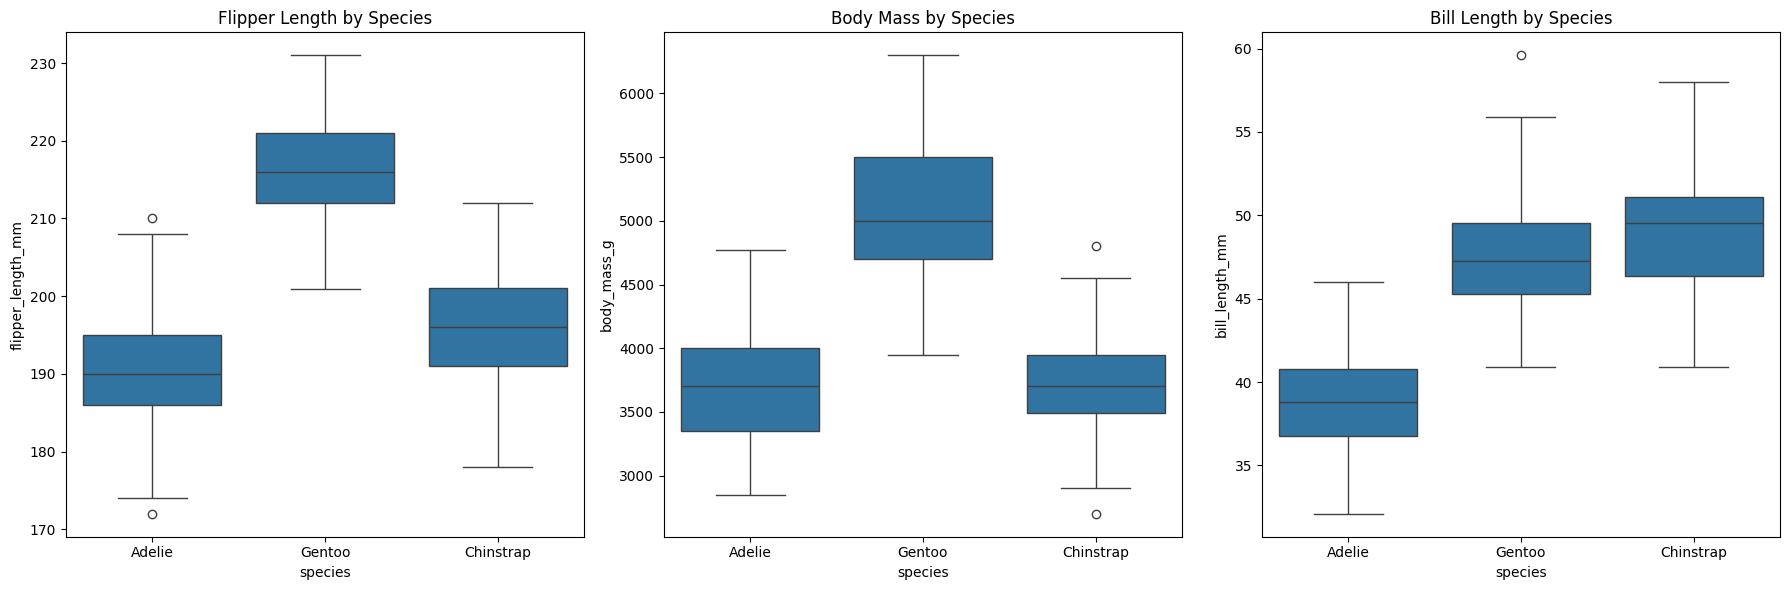

In [24]:
# Box Plots for Measurements
fig, axes = plt.subplots(1,3, figsize = (18,6))
sns.boxplot(data=df, x='species', y='flipper_length_mm', ax=axes[0])
axes[0].set_title('Flipper Length by Species')
sns.boxplot(data=df, x='species', y='body_mass_g', ax=axes[1])
axes[1].set_title('Body Mass by Species')
sns.boxplot(data=df, x='species', y='bill_length_mm', ax=axes[2])
axes[2].set_title('Bill Length by Species')
plt.tight_layout()
plt.show()

**Flipper Length**

* Gentoo penguins have the longest flippers by far, with little overlap compared to Adelie and Chinstrap.
* Adelie has the shortest flippers; Chinstrap sits in between.

**Body Mass**

* Gentoo is the heaviest species, with body mass \~5000–6000 g.
* Adelie and Chinstrap have similar, much lighter body masses (\~3500–4000 g).

**Bill Length**

* Chinstrap and Gentoo have longer bills on average, while Adelie has shorter, more compact bills.
* There’s noticeable spread (variation) within each species, especially in Gentoo.

Gentoo stands out for both flipper length and body mass, making it the physically largest species.\

Bill length separates Adelie from the other two, highlighting key species-level morphological differences.

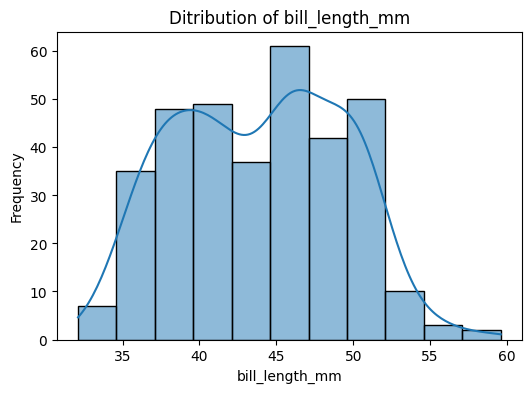

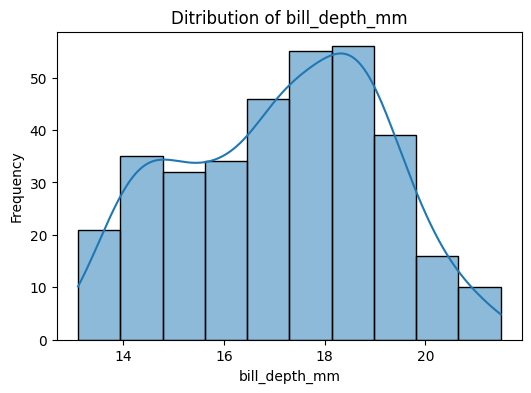

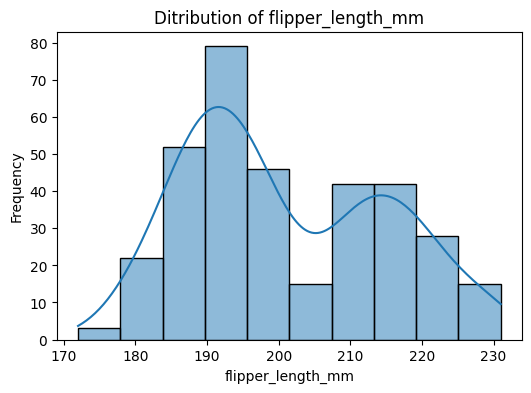

In [25]:
# Histogram of Measurements
measurements = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']
for measure in measurements:
    plt.figure(figsize=(6,4))
    sns.histplot(df[measure], kde=True)
    plt.title(f'Ditribution of {measure}')
    plt.xlabel(measure)
    plt.ylabel('Frequency')
    plt.show()

Bill Length (mm)

* Roughly normal distribution, centered around \~45 mm.
* Slight left skew (more shorter bills than longer ones).
* Broad range from \~32 mm to \~60 mm.

Bill Depth (mm)

* Also roughly normal, centered near \~18 mm.
* Mild right skew, with a few deeper bills pulling the upper end.
* Range spans \~13 mm to \~21 mm.

Flipper Length (mm)

* Bimodal-looking distribution → two visible peaks.
* Suggests two distinct groups: shorter flippers (\~185–195 mm) and longer flippers (\~210–220 mm), likely reflecting species differences (e.g., Gentoo vs. Adelie).
* Range from \~172 mm to \~230 mm.

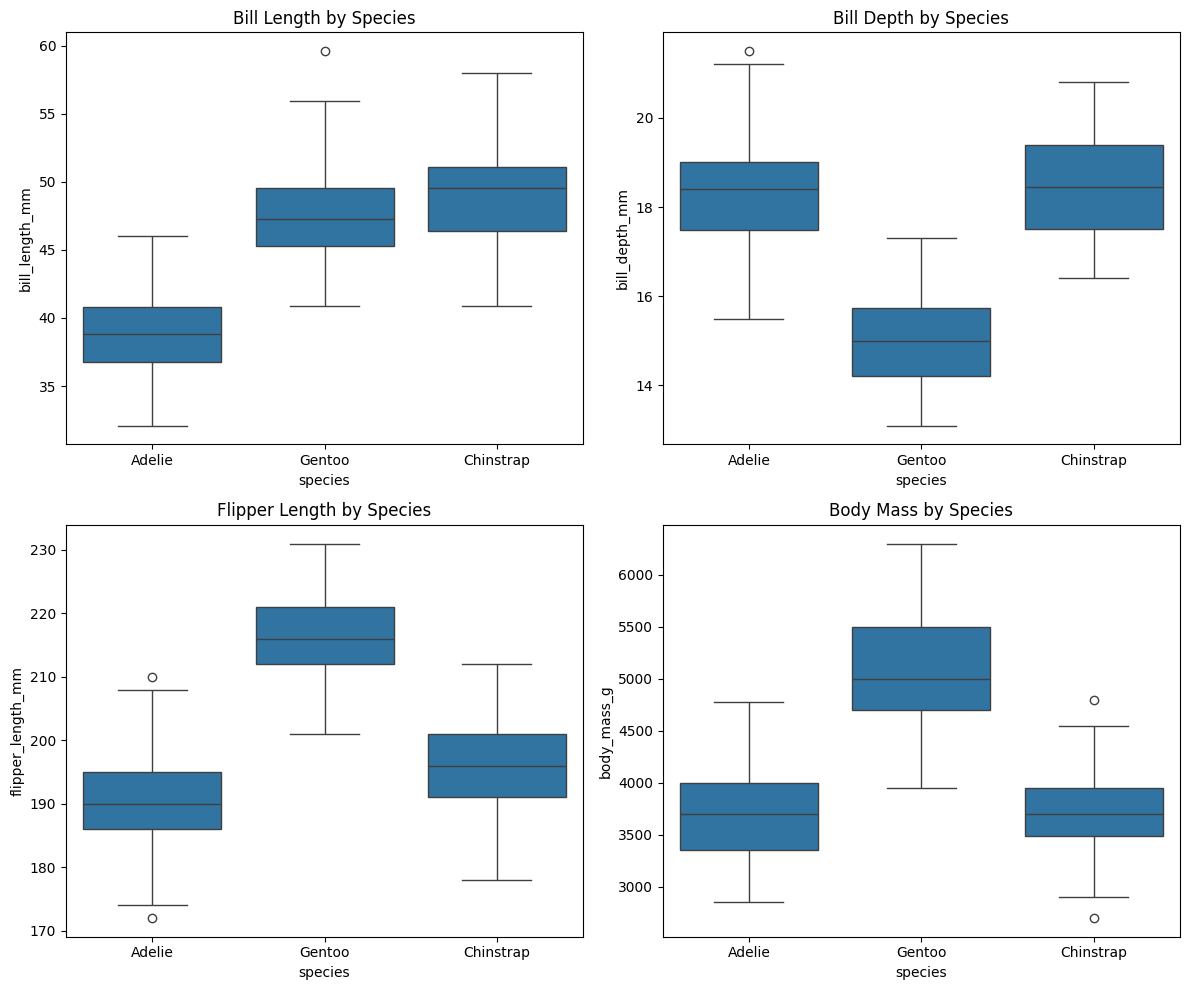

In [26]:
# Combined Subplots
fig, axs = plt.subplots(2,2, figsize=(12,10))
sns.boxplot(data=df, x='species', y='bill_length_mm', ax=axs[0,0])
axs[0,0].set_title('Bill Length by Species')
sns.boxplot(data=df, x='species', y='bill_depth_mm', ax=axs[0,1])
axs[0,1].set_title('Bill Depth by Species')
sns.boxplot(data=df, x='species', y='flipper_length_mm', ax=axs[1,0])
axs[1,0].set_title('Flipper Length by Species')
sns.boxplot(data=df, x='species', y='body_mass_g', ax=axs[1,1])
axs[1,1].set_title('Body Mass by Species')
plt.tight_layout()
plt.show()

 **Bill Length**

* Adelie: Shortest bills
* Gentoo & Chinstrap: Longer bills, similar ranges, with Chinstrap slightly ahead.

**Bill Depth**

* Adelie & Chinstrap: Deeper bills
* Gentoo: Noticeably shallower bills compared to the other two.

**Flipper Length**

* Gentoo: Longest flippers, clearly separated from Adelie and Chinstrap.
* Adelie: Shortest flippers.
* Chinstrap: Mid-range.

**Body Mass**

* Gentoo: Heaviest by far (\~5000–6000 g).
* Adelie & Chinstrap: Similar, lighter ranges (\~3500–4000 g).

Gentoo penguins stand out as the largest species in both size and weight.
Adelie penguins are generally smaller with shorter bills and flippers.
Chinstrap have deeper bills and body size similar to Adelie but with slightly longer bills.

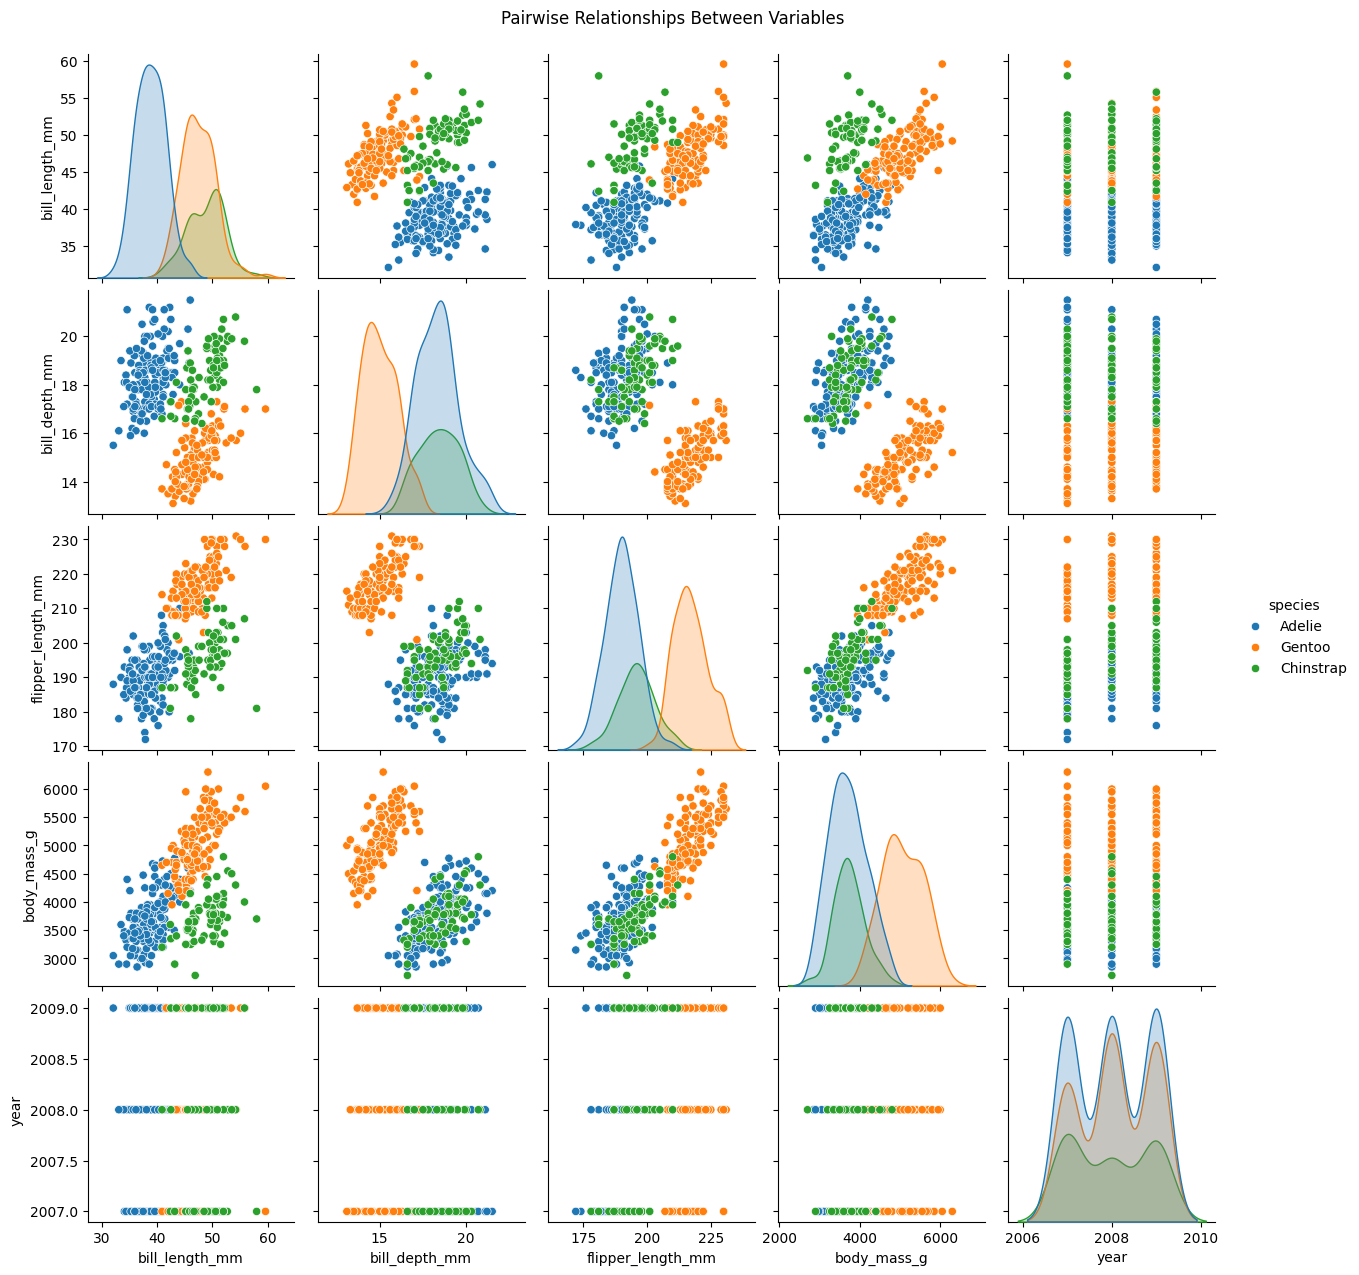

In [27]:
# Pairplot
sns.pairplot(df, hue='species')
plt.suptitle('Pairwise Relationships Between Variables', y=1.02)
plt.show()

**Clear species separation**

* Gentoo (orange) forms distinct, non-overlapping clusters, especially in flipper length and body mass — they’re the largest birds by far.
* Adelie (blue) and Chinstrap (green) overlap more but show subtle differences, especially in bill dimensions.

**Strong positive relationships**

* Flipper length vs. body mass shows a clear upward trend across species — bigger birds have longer flippers and weigh more.

**Bill dimensions patterns**

* Bill length vs. bill depth reveals contrasting shapes: Adelie has shorter, deeper bills, while Gentoo has longer, shallower bills.

**Year patterns**

* Data is evenly spread across 2007, 2008, and 2009, with no major clustering by year.

The pairplots beautifully highlight how **species identity is linked to body measurements**, making species relatively easy to separate based on morphological traits.
It also confirms that flipper length and body mass are the strongest size indicators, while bill measurements provide shape distinctions.

### **Conclusion**

**Species Differences**

* **Gentoo penguins** stand out as the largest species, with the longest flippers and heaviest body mass.
* **Adelie penguins** are generally the smallest, with shorter flippers and shorter, deeper bills.
* **Chinstrap penguins** have intermediate body mass and distinctive longer, shallower bills compared to Adelie.

**Relationships Between Measurements**

* There’s a strong positive correlation between **flipper length and body mass** — larger birds are heavier.
* **Bill length and bill depth** show distinct patterns, where species like Adelie favor deep, short bills, while Gentoo favor long, shallow bills.

**Distribution Across Islands**

* Most penguins were sampled on Biscoe and Dream islands, with fewer from Torgersen.

**Sex and Morphology**

* The sex distribution is fairly balanced within each species, providing a solid foundation for sex-based or morphological comparisons without major bias.